# Практическая работа № 6

## 

**Инструкция:**

- Получить данные из файла **Heart_Disease_Prediction_ru.csv**. Датасет разбить на тестовую и обучающую выборку. 
- Выполнить кластерный анализ с помощью алгоритма k-means.
- Постройть диаграмму рассеивания - scatter plot.
- Построить модель прогноза с помощью алгоритма Дерево решений. Провести обучение модели.
- Выполнить прогноз и провести оценку модели.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import plotly.graph_objs as go
import plotly as py

import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

**Получить данные из файла Heart_Disease_Prediction_ru.csv** 

In [2]:
# Ваш код здесь
df = pd.read_csv('Heart_Disease_Prediction_ru.csv')
df.describe()

,Возраст,Пол,Тип боли в груди,BP,Холестерин,FBS свыше 120,Результаты EKG,Max HR,Стенокардия,ST депрессия,Наклон ST,Количество сосудов флюро,Таллий
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [3]:
x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

# преобразуем целевую переменную
y = df['Сердечное заболевание'].values


**Разбить на тестовую и обучающую выборку**

In [6]:
# Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 13), (81, 13), (189,), (81,))

**Кластерный анализ на основе K средних**

In [7]:
# Ваш код здесь
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x) #Вычислить кластеризацию k-средних.
    wcss.append(kmeans.inertia_)

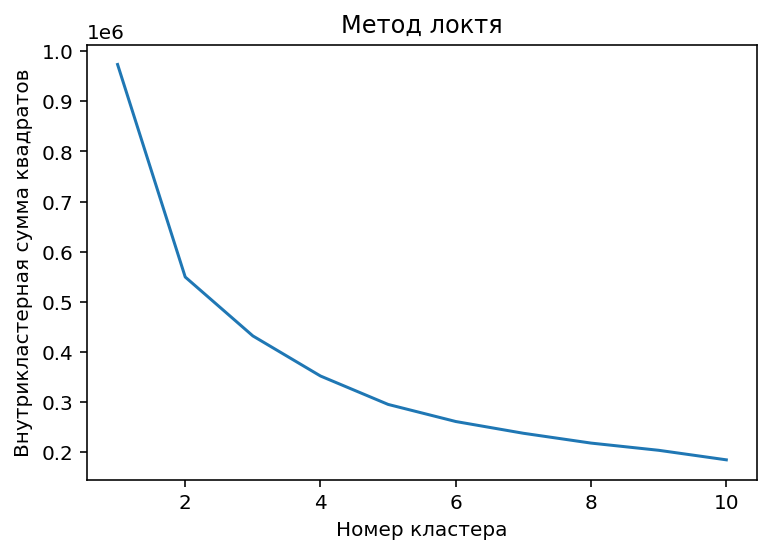

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Номер кластера')
plt.ylabel('Внутрикластерная сумма квадратов') 
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(x)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
Z = y_kmeans.predict(x)
df['seg_km1'] = Z
df.head()

,Возраст,Пол,Тип боли в груди,BP,Холестерин,FBS свыше 120,Результаты EKG,Max HR,Стенокардия,ST депрессия,Наклон ST,Количество сосудов флюро,Таллий,Сердечное заболевание,seg_km1
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,3
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,2
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,2


**Диаграмма рассеивания - scatter plot**

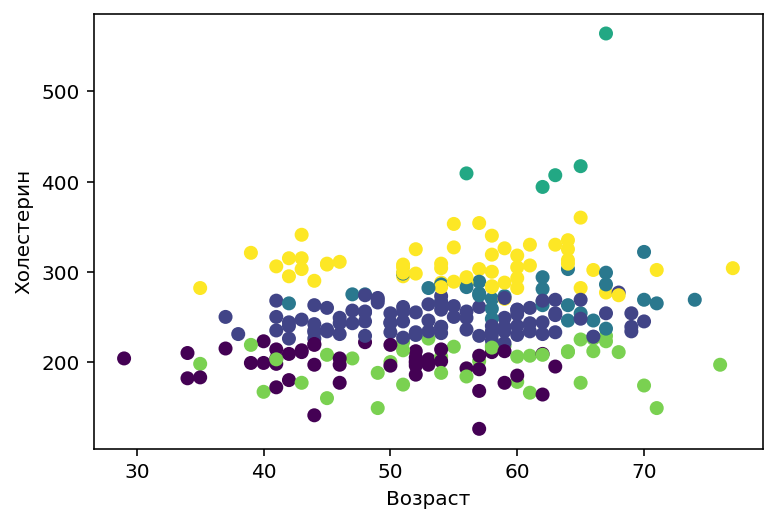

In [10]:
# Ваш код здесь
plt.scatter(x = df['Возраст'], y = df['Холестерин'], 
            c = df['seg_km1'], alpha = 1)
plt.xlabel('Возраст')
plt.ylabel('Холестерин');

**Модель машинного обучения с помощью алгоритма Дерево решений. Обучение модели**

In [25]:
# Ваш код здесь

X = df[['Возраст', 'Тип боли в груди']]

y = df['Сердечное заболевание']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 2), (54, 2), (216,), (54,))

In [29]:
predictors = ['Возраст', 'Тип боли в груди']
decision_tree_model1 = DecisionTreeClassifier(random_state=14, criterion='entropy',
                                   max_depth=3)
decision_tree_model1.fit(X_train[predictors], y_train)
y_pred = decision_tree_model1.predict(X_test[predictors])

**Прогноз и оценка модели**

In [30]:
# Ваш код здесь
dol_tree_model1 = accuracy_score(y_pred, y_test) * 100
print('Доля верных прогнозов: ', dol_tree_model1)

Доля верных прогнозов:  77.77777777777779


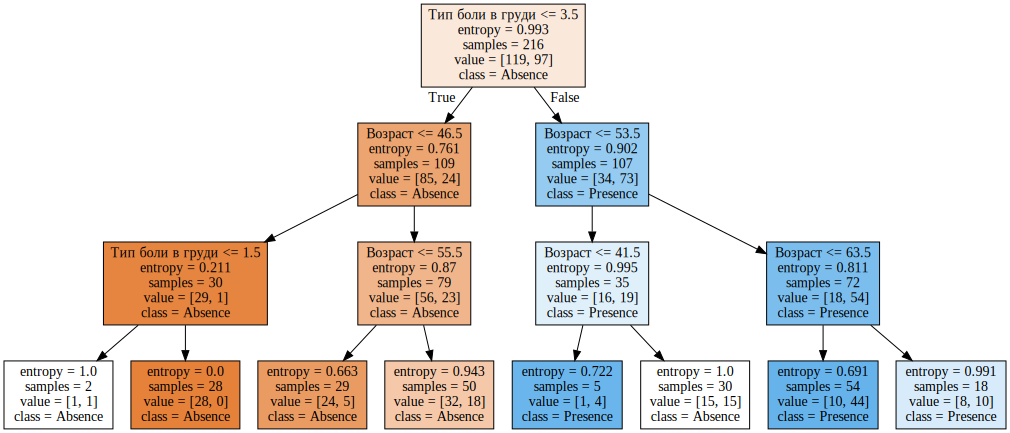

In [31]:
from graphviz import Source
from sklearn import tree
graph = Source(tree.export_graphviz(decision_tree_model1, out_file=None, 
                                    feature_names=predictors,
                                    filled=True, 
                                    class_names = decision_tree_model1.classes_))
from IPython.display import SVG
SVG(graph.pipe(format='svg'))